In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam
%matplotlib inline
import numpy as np 
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
layers = keras.layers
models = keras.models

In [ ]:
df = pd.read_csv('/content/drive/My Drive/gender project/Gender-prediction(all).csv',error_bad_lines=False)
df

,FullName,Gender
0,শ্বরিয়া ঘোষ,নারী
1,শিকা খায়ের এশা,নারী
2,এশা ধর,নারী
3,শিতা সুর আপন,নারী
4,র্মি সেন,নারী
...,...,...
5743,হোসেন বেপারি,পুরুষ
5744,হ্যান্ডরি জিতু,পুরুষ
5745,হ্যাপি আক্তার,নারী
5746,হ্যাপি রিচিল,নারী


In [ ]:
df['Gender'].value_counts()

নারী     2911
পুরুষ    2837
Name: Gender, dtype: int64

In [ ]:
train_size = int(len(df) * .80)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 4598
Test size: 1150


In [ ]:
def train_test_split(df, train_size):
    train = df[:train_size]
    test = df[train_size:]
    return train, test

In [ ]:
train_cat, test_cat = train_test_split(df['Gender'], train_size,)
train_text, test_text = train_test_split(df['FullName'], train_size,)

In [ ]:
max_words = 5000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)


In [ ]:

tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [ ]:

num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (4598, 5000)
x_test shape: (1150, 5000)
y_train shape: (4598, 2)
y_test shape: (1150, 2)


In [ ]:
batch_size = 32
epochs = 80
adam=keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_initializer='normal',input_shape=(max_words,)))
model.add(layers.Dropout(0.5))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Dropout(0.5))
model.add(layers.Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80016     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
_________________________________________________________________
dropout_1 (Dropout)          (None, 2)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 80,050
Trainable params: 80,050
Non-trainable params: 0
____________________________________________________

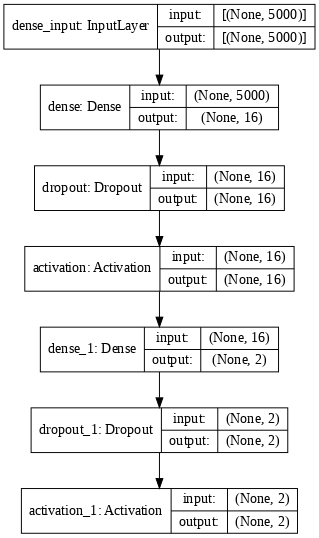

In [ ]:
import tensorflow.keras as keras
keras.utils.plot_model(model, show_shapes=True, dpi=70)

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.2)

Epoch 1/80
115/115 - 4s - loss: 0.6929 - accuracy: 0.5362 - val_loss: 0.6932 - val_accuracy: 0.5239
Epoch 2/80
115/115 - 0s - loss: 0.6870 - accuracy: 0.5593 - val_loss: 0.6913 - val_accuracy: 0.5011
Epoch 3/80
115/115 - 0s - loss: 0.6786 - accuracy: 0.5954 - val_loss: 0.6854 - val_accuracy: 0.5598
Epoch 4/80
115/115 - 0s - loss: 0.6656 - accuracy: 0.6275 - val_loss: 0.6797 - val_accuracy: 0.5717
Epoch 5/80
115/115 - 0s - loss: 0.6527 - accuracy: 0.6264 - val_loss: 0.6675 - val_accuracy: 0.6304
Epoch 6/80
115/115 - 0s - loss: 0.6377 - accuracy: 0.6721 - val_loss: 0.6560 - val_accuracy: 0.6522
Epoch 7/80
115/115 - 0s - loss: 0.6232 - accuracy: 0.6775 - val_loss: 0.6498 - val_accuracy: 0.6391
Epoch 8/80
115/115 - 0s - loss: 0.6076 - accuracy: 0.6884 - val_loss: 0.6379 - val_accuracy: 0.6663
Epoch 9/80
115/115 - 0s - loss: 0.5898 - accuracy: 0.7047 - val_loss: 0.6217 - val_accuracy: 0.6924
Epoch 10/80
115/115 - 0s - loss: 0.5823 - accuracy: 0.7159 - val_loss: 0.6215 - val_accuracy: 0.6804

In [ ]:

score = model.evaluate(x_train, y_train,
                       batch_size=batch_size, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

144/144 - 0s - loss: 0.1727 - accuracy: 0.9348
Train loss: 0.17267440259456635
Train accuracy: 0.9347542524337769


In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

36/36 - 0s - loss: 0.5028 - accuracy: 0.7365
Test loss: 0.502759575843811
Test accuracy: 0.7365217208862305


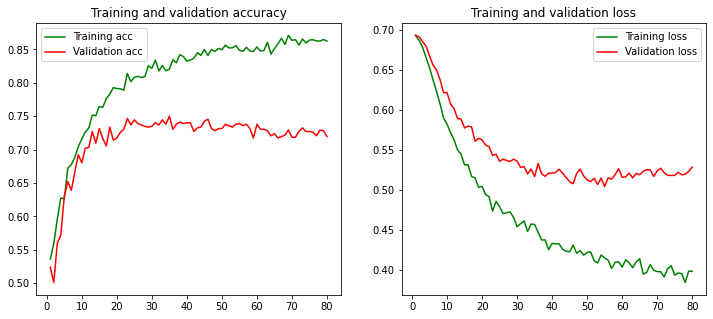

In [ ]:

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [ ]:

text_labels = encoder.classes_ 
for i in range(350,360):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual NewsType:' + test_cat.iloc[i])
    print("Predicted NewsType: " + predicted_label + "\n")


সাগর সরদার ...
Actual NewsType:পুরুষ
Predicted NewsType: পুরুষ

সাগর সোনজিব কোরায়া ...
Actual NewsType:পুরুষ
Predicted NewsType: পুরুষ

সাগরিকা বারচেগ ...
Actual NewsType:নারী
Predicted NewsType: নারী

সাগোর পেরেরা ...
Actual NewsType:পুরুষ
Predicted NewsType: পুরুষ

সাগোর বড়ুয়া ...
Actual NewsType:পুরুষ
Predicted NewsType: পুরুষ

সাগোর বড়ুয়া ...
Actual NewsType:পুরুষ
Predicted NewsType: পুরুষ

সাঙ্গরাক চ মারাক ...
Actual NewsType:পুরুষ
Predicted NewsType: পুরুষ

সাজনা হরি মলসোম ...
Actual NewsType:নারী
Predicted NewsType: নারী

সাজিদ আহম্মেদ ...
Actual NewsType:পুরুষ
Predicted NewsType: পুরুষ

সাজিদা বাসাক ...
Actual NewsType:নারী
Predicted NewsType: নারী



In [ ]:
y_sigmoid = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_sigmoid)):
    probs = y_sigmoid[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [ ]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/content/drive/My Drive/gender project/kalpurush.ttf')
fontproperties=prop
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=50, fontproperties=prop)
    plt.yticks(tick_marks, classes, fontsize=25, fontproperties=prop)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)

Confusion Matrix


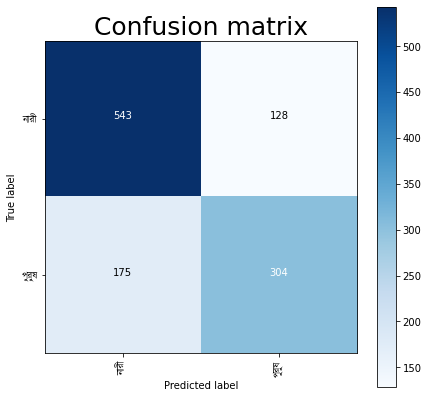

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()